In [111]:


# -----------------------------
# Step 0: Import Libraries
# -----------------------------
import pandas as pd
import re
import nltk
import pickle
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from google.colab import files
import pandas as pd
# -----------------------------
# Step 2: Load Dataset
# -----------------------------

# Upload the file
uploaded = files.upload()  # This will open a file chooser

# Get the filename
filename = list(uploaded.keys())[0]

# Load CSV into DataFrame
df = pd.read_csv(filename)

# Preview the dataset
print("Dataset Sample:")
print(df.head())


: 

In [113]:
# -----------------------------
# Step 1: Download NLTK Stopwords
# -----------------------------
# Custom stopwords: remove normal stopwords but keep negations
negations = {'no', 'not', 'never'}
custom_stopwords = set(stopwords.words('english')) - negations

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in custom_stopwords]
    return " ".join(tokens)


In [114]:
# -----------------------------
# Step 3: Create Sentiment Labels
# -----------------------------
# 1 → Positive (Rating >=4), 0 → Negative (Rating <=3)
df['Sentiment'] = df['Rating'].apply(lambda x: 1 if x >= 4 else 0)
print("\nSentiment Column Added:")
print(df[['Review','Rating','Sentiment']].head())


Sentiment Column Added:
                                              Review  Rating  Sentiment
0  Best under 60k Great performanceI got it for a...       5          1
1                                 Good perfomence...       5          1
2  Great performance but usually it has also that...       5          1
3           My wife is so happy and best product 👌🏻😘       5          1
4  Light weight laptop with new amazing features,...       5          1


In [115]:
negation_words = {"not", "no", "never", "n't"}
stop_words_modified = stop_words - negation_words

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words_modified]
    return " ".join(tokens)

df['Cleaned_Review'] = df['Review'].apply(preprocess_text)
print(df[['Review','Cleaned_Review']].head())


                                              Review  \
0  Best under 60k Great performanceI got it for a...   
1                                 Good perfomence...   
2  Great performance but usually it has also that...   
3           My wife is so happy and best product 👌🏻😘   
4  Light weight laptop with new amazing features,...   

                                      Cleaned_Review  
0  best k great performancei got around battery b...  
1                                    good perfomence  
2  great performance usually also gaming laptops ...  
3                            wife happy best product  
4  light weight laptop new amazing features batte...  


In [116]:
# -----------------------------
# Step 5: Convert Text to Numeric Features (TF-IDF)
# -----------------------------
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned_Review'])
y = df['Sentiment']
print(df.head())

   Unnamed: 0                                       Product_name  \
0           0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1           1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2           2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3           3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4           4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  Sentiment  \
0  Best under 60k Great performanceI got it for a...       5          1   
1                                 Good perfomence...       5          1   
2  Great performance but usually it has also that...       5          1   
3           My wife is so happy and best product 👌🏻😘       5          1   
4  Light weight laptop with new amazing features,...       5          1   

                                      Cleaned_Review  
0  best k great performancei got around battery b...  
1                             

In [117]:
print("Feature matrix shape (X):", X.shape)
print("Labels shape (y):", y.shape)


Feature matrix shape (X): (2304, 4693)
Labels shape (y): (2304,)


In [118]:
# -----------------------------
# Step 6: Split Dataset
# -----------------------------
#X_train, X_test, y_train, y_test = train_test_split(
 #   X, y, test_size=0.2, random_state=42)

 # -----------------------------
# Step 6: Split Dataset (Stratified)
# -----------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # ensures same class distribution in train & test
)

print("Training set positive/negative distribution:")
print(y_train.value_counts())

print("\nTest set positive/negative distribution:")
print(y_test.value_counts())


Training set positive/negative distribution:
Sentiment
1    1547
0     296
Name: count, dtype: int64

Test set positive/negative distribution:
Sentiment
1    387
0     74
Name: count, dtype: int64


In [119]:
# -----------------------------
# Step 7: Train Logistic Regression Model
# -----------------------------
#model = LogisticRegression()
#model.fit(X_train, y_train)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=500)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=500)

In [120]:
# -----------------------------
# Step 8: Evaluate Model
# -----------------------------
y_pred = model.predict(X_test)

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Accuracy: 0.9392624728850325

Confusion Matrix:
 [[ 62  12]
 [ 16 371]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        74
           1       0.97      0.96      0.96       387

    accuracy                           0.94       461
   macro avg       0.88      0.90      0.89       461
weighted avg       0.94      0.94      0.94       461



In [127]:
# -----------------------------
# Step 9: Save Model & Vectorizer
# -----------------------------
# Step 1: Import
from google.colab import files
import joblib

# Step 2: Save your model and vectorizer (if not already saved)
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

# Step 3: Download the files
files.download('sentiment_model.pkl')
files.download('vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [122]:
def predict_sentiment(review):
    print("\nOriginal Review:", review)

    # Step 1: Preprocess
    review_cleaned = preprocess_text(review)
    print("Cleaned Review:", review_cleaned)

    # Step 2: Convert to features
    features = vectorizer.transform([review_cleaned])
    print("Feature Vector Shape:", features.shape)
    print("Feature Vector Sample (non-zero indices):", features.nonzero())

    # Step 3: Predict
    prediction = model.predict(features)
    print("Raw Model Prediction:", prediction)

    # Step 4: Map to sentiment
    sentiment = "Positive" if prediction[0] == 1 else "Negative"
    print("Mapped Sentiment:", sentiment)

    return sentiment

# Example usage
sample_review = "this is very bad one"
print("\nPredicted Sentiment:", predict_sentiment(sample_review))



Original Review: this is very bad one
Cleaned Review: bad one
Feature Vector Shape: (1, 4693)
Feature Vector Sample (non-zero indices): (array([0, 0], dtype=int32), array([ 289, 2805], dtype=int32))
Raw Model Prediction: [0]
Mapped Sentiment: Negative

Predicted Sentiment: Negative


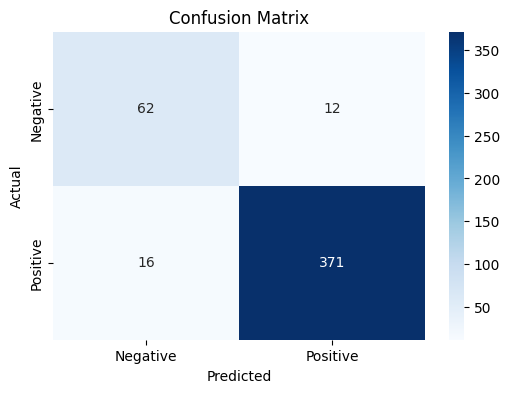

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Using seaborn heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


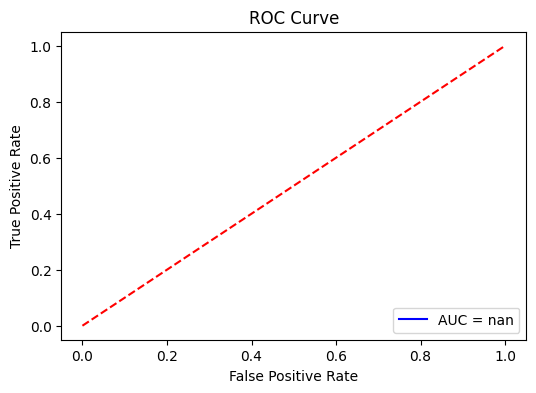

In [124]:
#ROC Curve is useful if you want to see how well your model separates classes.
#ROC Curve → Shows trade-off between TPR and FPR, gives AUC score.
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert labels to binary if they are strings
y_test_bin = label_binarize(y_test, classes=['Negative','Positive'])
y_pred_prob = model.predict_proba(X_test)[:,1]  # probability for positive class

fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


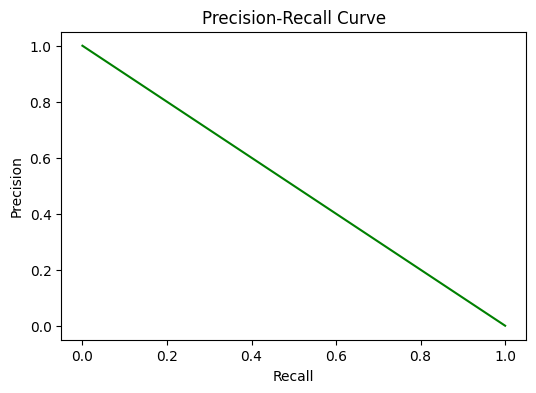

In [125]:
from sklearn.metrics import precision_recall_curve
#Precision-Recall Curve → Shows precision vs recall, useful for imbalanced datasets.
precision, recall, thresholds = precision_recall_curve(y_test_bin, y_pred_prob)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


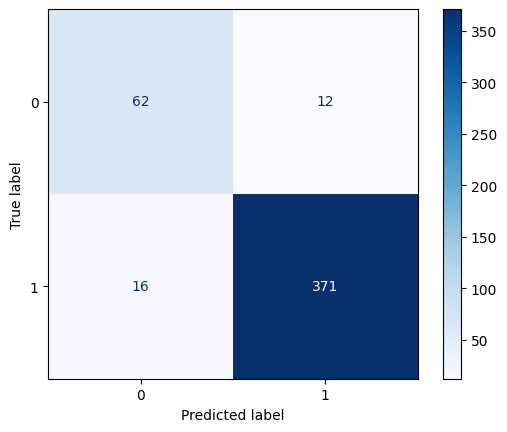

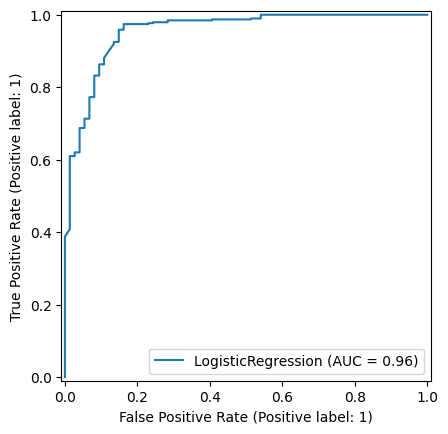

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix plot
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

# ROC Curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()
